In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

In [2]:
bankcustdata = pd.read_csv('/content/Bank_customer_data.csv')

# Check for missing values
print(bankcustdata.isnull().sum())

bankcustdata.fillna(bankcustdata.median(), inplace=True)

ID                    0
Age                   0
Experience            0
Income                0
Zipcode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64


In [4]:
bankcustdata.dropna(inplace=True)

# anomalous values

for col in ["Income", "CCAvg", "Mortgage"]:
    bankcustdata = bankcustdata[np.abs(bankcustdata[col] - bankcustdata[col].mean()) <= (3 * bankcustdata[col].std())]

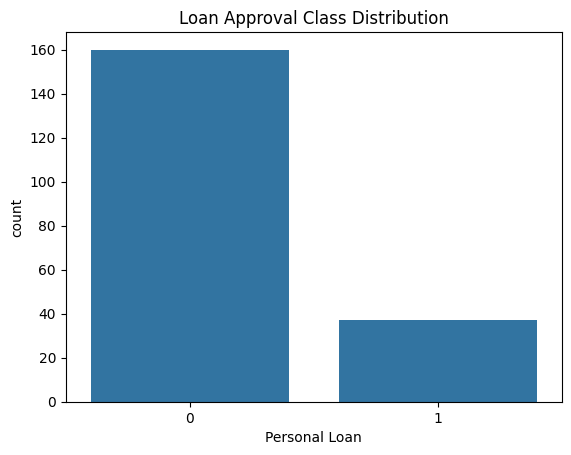

Personal Loan
0    0.812183
1    0.187817
Name: proportion, dtype: float64


In [5]:
# Handling Class Imbalance

sns.countplot(x=bankcustdata["Personal Loan"])
plt.title("Loan Approval Class Distribution")
plt.show()

print(bankcustdata["Personal Loan"].value_counts(normalize=True))  # Check class ratios

In [6]:
# Feature Engineering

bankcustdata.drop(columns=["ID", "Zipcode"], errors="ignore", inplace=True)

print("Columns after dropping unnecessary features:", bankcustdata.columns.tolist())

# Normalize/Standardize Numerical Features

scaler = StandardScaler()
numerical_features = ["Age", "Experience", "Income", "CCAvg", "Mortgage", "Family"]
bankcustdata[numerical_features] = scaler.fit_transform(bankcustdata[numerical_features])

print("First 5 rows of scaled numerical features:\n", bankcustdata[numerical_features].head())

Columns after dropping unnecessary features: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard', 'Personal Loan']
First 5 rows of scaled numerical features:
         Age  Experience    Income     CCAvg  Mortgage    Family
0 -0.472827   -0.099498  1.696976  2.563337 -1.191972 -1.419830
1 -0.155281   -0.210238  0.243396 -0.956090  0.440571  0.683226
2  2.808487    0.232724  1.448337  0.664889  0.574386 -0.718811
3 -1.637165   -0.431720 -0.674654 -1.002803 -1.412767 -0.718811
5  0.479812    0.897167  0.492035 -0.543290  0.915614 -0.718811


In [7]:
# Data Splitting

X = bankcustdata.drop(columns=["Personal Loan"])  # Features
y = bankcustdata["Personal Loan"]  # Target variable


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Shape: {X_train.shape}, Testing Shape: {X_test.shape}")

Training Shape: (157, 11), Testing Shape: (40, 11)
